<a href="https://colab.research.google.com/github/hkbu-kennycheng/comp3925/blob/main/lab4%20exploratory%20data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lab4 exploratory data analysis

In [2]:
import requests
import json
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from tqdm import tqdm

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# Revision of web data crawling

Wrapping requests with a function which would return a `BeautifulSoup` object.

In [ ]:
def searchParknShopSoup(keyword, perPage, page):
  headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.1.2 Safari/605.1.15'
  }
  r = requests.get(f'https://www.parknshop.com/search?q=&page={page}&resultsForPage={perPage}&text={keyword}&sort=&category2nd=0&category3rd=0&minSel=4.0&maxSel=1650.0&minSlider=4.0&maxSlider=1650.0&strictSearch=&_=1644309749305', headers=headers)
  soup = BeautifulSoup(r.text)
  return soup

Make use of above function to develop a function for getting total number of products.

In [ ]:
def searchParknShopTotal(keyword):
  soup = searchParknShopSoup(keyword, 1, 1)
  total = int(soup.select_one('.search-result-title-container .totalNumber').text)
  return total 

In [ ]:
total = searchParknShopTotal('0')
total

13945

In [ ]:
def searchParknShopWithPage(keyword, perPage, pageNum):
  total = searchParknShopTotal(keyword)
  if total == 0:
    return pd.DataFrame(columns=['name', 'price'])
    
  soup = searchParknShopSoup(keyword, perPage, pageNum)
  return pd.DataFrame([{
      'name': ''.join([e.text.strip() for e in e.select('.name .text')]),
      'price': ' '.join([e.text.strip().lstrip('HK$').replace(',','') for e in e.select('.discount')])
  } for e in soup.select(".product-container .item")])

In [ ]:
perPage = 150
df = searchParknShopWithPage('(0)', perPage, 1)
df

,name,price
0,Dishwash Detergent-lemon,21.00
1,Oregano,20.50
2,Mr Juicy 100% Apple Juice,20.50
3,Malkist Lemon Flavour Sandwich,19.90
4,Scrub Sponge,9.90
...,...,...
145,85 Dark Chocolate,29.90
146,Oolong Tea Bags,10.90
147,Dried Apricots,29.90
148,Baked Beans In Tomato Sauce,9.90


Looping through all pages to get all product data

In [ ]:
for i in tqdm(range(1, total // perPage + 1)):
  df = df.append(searchParknShopWithPage('0', perPage, i))

100%|██████████| 92/92 [22:44<00:00, 14.83s/it]


Save as a csv file for backup

In [ ]:
df.to_csv('pns.csv')

In [2]:
!wget https://gist.githubusercontent.com/hkbu-kennycheng/2f08dff0e3c7886c5e607556b2fed21d/raw/f1f3a6794e6deb9b75ec3084a11b21ac247d822d/pns.csv

--2022-02-09 03:58:01--  https://gist.githubusercontent.com/hkbu-kennycheng/2f08dff0e3c7886c5e607556b2fed21d/raw/f1f3a6794e6deb9b75ec3084a11b21ac247d822d/pns.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 518112 (506K) [text/plain]
Saving to: ‘pns.csv’

pns.csv             100%[===================>] 505.97K  --.-KB/s    in 0.05s   

2022-02-09 03:58:02 (10.9 MB/s) - ‘pns.csv’ saved [518112/518112]



In [3]:
df = pd.read_csv('pns.csv', index_col=0)

In [ ]:
df

,name,price
0,Ham Sliced,39.9
1,Instant Oatmeal,27.9
2,Dishwash Detergent-lemon,21.0
3,Oregano,20.5
4,Mr Juicy 100% Apple Juice,20.5
...,...,...
13749,Finland Pork Tenderloin,50.9
13750,Asw Lime + Sailormoon Plate (random Pick),43.9
13751,Frozen Handcraft Udon,69.9
13752,Foaming Hw - Bottle + Refill (baby Powder),49.9


In [ ]:
df.describe()

,price
count,13751.000000
mean,63.211244
std,108.908153
min,2.800000
25%,19.900000
50%,34.900000
75%,67.000000
max,2245.000000


In [ ]:
df['price'].describe()

count    13751.000000
mean        63.211244
std        108.908153
min          2.800000
25%         19.900000
50%         34.900000
75%         67.000000
max       2245.000000
Name: price, dtype: float64

Replace with `np.nan`

In [ ]:
df['price'].replace('', np.nan, inplace=True)

## Mannings HK

In [ ]:
def tryMannings(keyword, pageNum):
  headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.1.2 Safari/605.1.15'
  }
  r = requests.get(f'https://www.mannings.com.hk/search?q={keyword}&page={pageNum}', headers=headers)
  return r.text

In [ ]:
tryMannings('2',0)

'<!DOCTYPE html>\n<html lang="zh" >\n<head>\n    <meta charset="utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<meta name="robots" content="noindex">\n<meta id="queue-it_log" data-userid="0dc30916-7bc6-4bd8-9a30-4132744a05c4" data-proxyurl="https://logging.queue-it.net/logging/event" data-assemblyversion="4.4.447.0" />\n<title>Queue-it</title>\n\n    \n\n<link rel="apple-touch-icon-precomposed" sizes="144x144" href="//assets.queue-it.net/static/QueueFront/img/apple-touch-icon-144x144_7ca7792e6a9ca7868f574af6b9a7804d.png" />\n<link rel="apple-touch-icon-precomposed" sizes="152x152" href="//assets.queue-it.net/static/QueueFront/img/apple-touch-icon-152x152_d4b7d9278ce897bc68607c367f79e7cc.png" />\n<link rel="apple-touch-icon" href="//assets.queue-it.net/static/QueueFront/img/queue-it_appletouch_7ca7792e6a9ca7868f574af6b9a7804d.png" />\n<link rel="icon" type="image/png" href="//assets.que

# Advanced web crawling with pyppeteer

In [4]:
!apt update
!apt install chromium-browser chromium-chromedriver fonts-noto fonts-noto-cjk

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 https://developer.download.nvidia.com/compute/c

In [5]:
!pip install pyppeteer nest_asyncio

     |████████████████████████████████| 83 kB 1.3 MB/s 
     |████████████████████████████████| 138 kB 25.6 MB/s 
     |████████████████████████████████| 111 kB 55.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
import asyncio
import nest_asyncio
from pyppeteer import launch

nest_asyncio.apply()

Saving screenshot

In [ ]:
async def main():
  browser = await launch({'executablePath':'/usr/bin/chromium-browser', 'headless': True, 'args':['--no-sandbox']})
  page = await browser.newPage() # open a new browser window
  await page.goto('https://www.mannings.com.hk/search?q=2&page=27') # goto the url
  await page.screenshot({'path': 'example.png'}) # save screenshot as example.png
  await browser.close() # close browser window

asyncio.get_event_loop().run_until_complete(main())

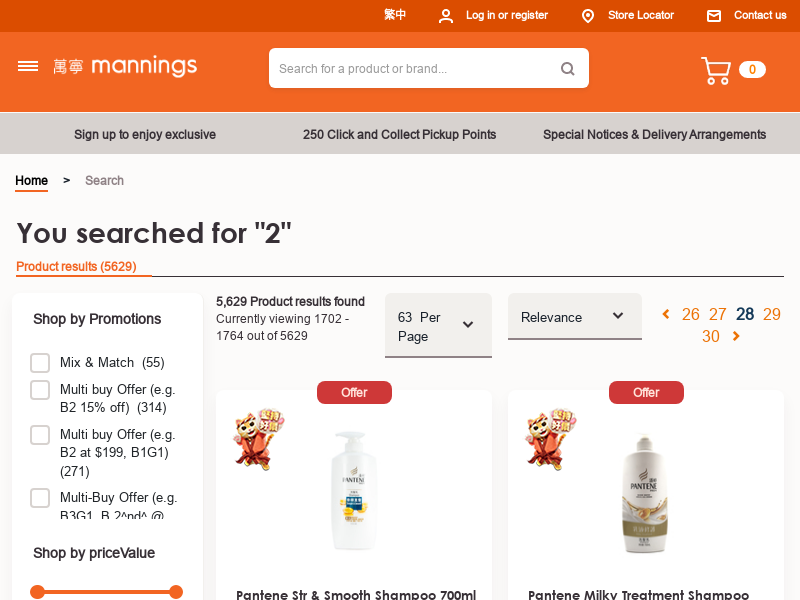

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('example.png')
cv2_imshow(img)

Getting text in a single element

In [7]:
async def searchTotal():
  browser = await launch({'executablePath':'/usr/bin/chromium-browser', 'headless': True, 'args':['--no-sandbox']})
  page = await browser.newPage()
  await page.goto('https://www.mannings.com.hk/search?q=2&page=0', { 'waitUntil':'networkidle0' })
  await page.screenshot({'path': 'error.png'})
  total = await page.Jeval('.pagination-bar-results b', 'function(node) { return node.textContent }')
  print(total.strip())
  await browser.close()

To run `async` function, we need to pass the function into `asyncio.get_event_loop().run_until_complete`.

In [ ]:
asyncio.get_event_loop().run_until_complete(searchTotal())

5,629 Product results found


Wrapping up long code statement via function with simple name.

In [4]:
def run(func):
  return asyncio.get_event_loop().run_until_complete(func)

In [ ]:
run(searchTotal())

5,629 Product results found


Getting return value from `async` function with `asyncio.gather`. `asyncio.gather` allows multiple functions as input, thus it will return a list of return values of each function. 

In [5]:
def runAndReturn(func):
  return asyncio.get_event_loop().run_until_complete(asyncio.gather(func))[0]

In [6]:
async def searchManningsTotal(keyword):
  browser = await launch({'executablePath':'/usr/bin/chromium-browser', 'headless': True, 'args':['--no-sandbox']})
  page = await browser.newPage()
  await page.goto(f'https://www.mannings.com.hk/search?q={keyword}', { 'waitUntil':'networkidle0' })
  total = int((await page.Jeval('.pagination-bar-results b', 'function(node) { return node.textContent }')).replace('Product results found','').replace(',',''))
  await browser.close()
  return total

In [7]:
total = runAndReturn(searchManningsTotal('2'))
print(total)

5629


Looping throught multiple elements with `page.JJ`.

In [8]:
async def searchManningsWithPage(keyword, page):
  browser = await launch({'executablePath':'/usr/bin/chromium-browser', 'headless': True, 'args':['--no-sandbox']})
  context = await browser.createIncognitoBrowserContext() # create an incognito window
  page = await context.newPage() # open a new tab in browser
  await page.goto(f'https://www.mannings.com.hk/search?q={keyword}&page={page}', { 'waitUntil':'networkidle0' })
  data = [{
    'name': (await e.Jeval('.product_name','function(node) { return node.textContent }')).strip(),
    'price': float((await e.Jeval('.price','function(node) { return node.textContent }')).strip().lstrip('$').replace(',',''))
  } for e in await page.JJ('.product_content')]
  await context.close()
  await browser.close()
  return pd.DataFrame(data)

In [9]:
runAndReturn(searchManningsWithPage('2', 0))

,name,price
0,Ange Orange Teether 1pc,88.0
1,Playtex Gentle Glide Tampon - Super Plus 18pcs,47.9
2,Illuma Organic Stage 2 850g,500.0
3,Aptamil Essensis HMO Stage 2 900g,528.0
4,Aptamil Essensis PHP Stage 2 900g,538.0
...,...,...
58,HiPP Organic Combiotic® HMP Toddler Milk Stage...,318.0
59,Nestlé® NAN® INFINIPRO® 1 Upgraded Formula 800g,438.0
60,Nestlé® NAN® INFINIPRO® 4 Upgraded Formula 800g,348.0
61,HiPP Organic Combiotic® HMP Infant Formula (st...,350.0


In [11]:
manningsdf = pd.DataFrame(columns=['name', 'price'])

In [ ]:
from time import sleep

pageSequence = [i for i in range(1, total // 63 + 1)] # generate a list of page numbers
np.random.shuffle(pageSequence) # shuffle the list

for i in tqdm(pageSequence):
  data = runAndReturn(searchManningsWithPage('2', i))
  manningsdf = manningsdf.append(data, ignore_index=True)
  sleep(np.random.uniform(2, 5)) # perform a random delay from 2 to 9 second

 78%|███████▊  | 69/89 [19:19<05:37, 16.87s/it]

In [13]:
manningsdf

,name,price
0,Ange Orange Teether 1pc,88.0
1,Playtex Gentle Glide Tampon - Super Plus 18pcs,47.9
2,Illuma Organic Stage 2 850g,500.0
3,Aptamil Essensis HMO Stage 2 900g,528.0
4,Aptamil Essensis PHP Stage 2 900g,538.0
...,...,...
58,HiPP Organic Combiotic® HMP Toddler Milk Stage...,318.0
59,Nestlé® NAN® INFINIPRO® 1 Upgraded Formula 800g,438.0
60,Nestlé® NAN® INFINIPRO® 4 Upgraded Formula 800g,348.0
61,HiPP Organic Combiotic® HMP Infant Formula (st...,350.0


Make a backup first

In [73]:
manningsdf.to_csv('mannings.csv')

In [ ]:
!wget https://gist.githubusercontent.com/hkbu-kennycheng/8e719a45890bc9bcd47fa353598fcb1e/raw/8a7c3e74e327b47aa58dbccb3539660a276ac574/mannings.csv

In [ ]:
manningsdf = pd.read_csv('mannings.csv')

# Exercise

create a `source` colume in parknshap dataframe `df` with value `parknshop`

create a `source` colume in mannings dataframe `manningsdf` with value `mannings`

Merging Mannings data with parknshop data in a single `df`

,name,price,source
0,9inch Plastic Plates-clear,20.9,parknshop
1,Select Brazilian Mid Joint Wing 2lb,50.9,parknshop
2,Mr Juicy 100% Orange Juice,20.5,parknshop
3,Distilled Water(random Pick),5.5,parknshop
4,A4 Writing Pad,14.9,parknshop
...,...,...,...
16610,HiPP Organic Combiotic® HMP Toddler Milk Stage...,318.0,mannings
16611,Nestlé® NAN® INFINIPRO® 1 Upgraded Formula 800g,438.0,mannings
16612,Nestlé® NAN® INFINIPRO® 4 Upgraded Formula 800g,348.0,mannings
16613,HiPP Organic Combiotic® HMP Infant Formula (st...,350.0,mannings


## Data visulization and feature extraction

In [18]:
df[df['source'] == 'mannings'].count()

name      2898
price     2898
source    2898
dtype: int64

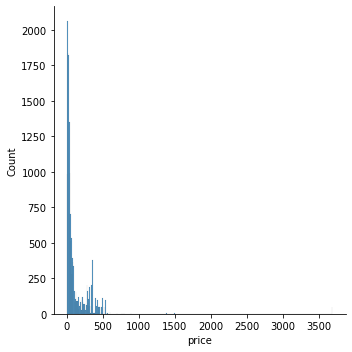

In [19]:
sns.displot(df, x="price")

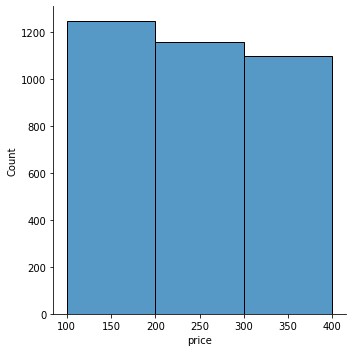

In [20]:
sns.displot(df, x="price", bins=[100, 200, 300, 400])

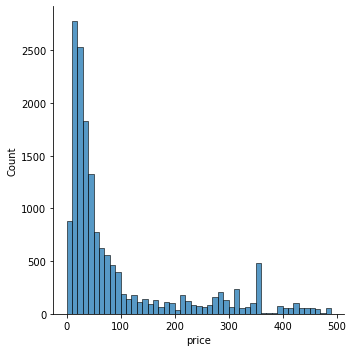

In [25]:
sns.displot(df, x="price", bins=[i for i in range(0, 500, 10)])

Price range

In [49]:
bins = [i for i in range(0, 500, 10)]
labels = [f'{i-10}-{i-0.01}' for i in range(10, 500, 10)]
df['price_group10'] = pd.cut(df.price, bins, labels = labels,include_lowest = True)
df

,name,price,source,organic,price_group10
0,9inch Plastic Plates-clear,20.9,parknshop,0,20-29.99
1,Select Brazilian Mid Joint Wing 2lb,50.9,parknshop,0,50-59.99
2,Mr Juicy 100% Orange Juice,20.5,parknshop,0,20-29.99
3,Distilled Water(random Pick),5.5,parknshop,0,0-9.99
4,A4 Writing Pad,14.9,parknshop,0,10-19.99
...,...,...,...,...,...
16610,HiPP Organic Combiotic® HMP Toddler Milk Stage...,318.0,mannings,1,310-319.99
16611,Nestlé® NAN® INFINIPRO® 1 Upgraded Formula 800g,438.0,mannings,0,430-439.99
16612,Nestlé® NAN® INFINIPRO® 4 Upgraded Formula 800g,348.0,mannings,0,340-349.99
16613,HiPP Organic Combiotic® HMP Infant Formula (st...,350.0,mannings,1,340-349.99


In [50]:
bins = [i for i in range(0, 500, 100)]
labels = [f'{i-100}-{i-0.01}' for i in range(100, 500, 100)]
df['price_group100'] = pd.cut(df.price, bins, labels = labels,include_lowest = True)
df

,name,price,source,organic,price_group10,price_group100
0,9inch Plastic Plates-clear,20.9,parknshop,0,20-29.99,0-99.99
1,Select Brazilian Mid Joint Wing 2lb,50.9,parknshop,0,50-59.99,0-99.99
2,Mr Juicy 100% Orange Juice,20.5,parknshop,0,20-29.99,0-99.99
3,Distilled Water(random Pick),5.5,parknshop,0,0-9.99,0-99.99
4,A4 Writing Pad,14.9,parknshop,0,10-19.99,0-99.99
...,...,...,...,...,...,...
16610,HiPP Organic Combiotic® HMP Toddler Milk Stage...,318.0,mannings,1,310-319.99,300-399.99
16611,Nestlé® NAN® INFINIPRO® 1 Upgraded Formula 800g,438.0,mannings,0,430-439.99,NaN
16612,Nestlé® NAN® INFINIPRO® 4 Upgraded Formula 800g,348.0,mannings,0,340-349.99,300-399.99
16613,HiPP Organic Combiotic® HMP Infant Formula (st...,350.0,mannings,1,340-349.99,300-399.99


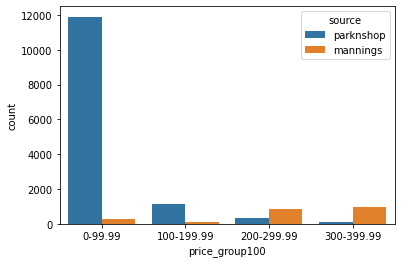

In [51]:
sns.countplot(x='price_group100', hue='source', data=df)

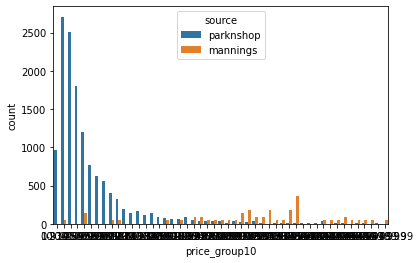

In [52]:
sns.countplot(x='price_group10', hue='source', data=df)

In [63]:
df['price_cent'] = df['price'] - np.floor(df['price'])
df['price_cent'] = np.floor(df['price_cent'] * 10)


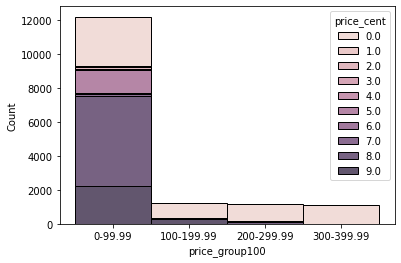

In [65]:
sns.histplot(df, x='price_group100', hue='price_cent', stat='count', binwidth=1, multiple='stack')

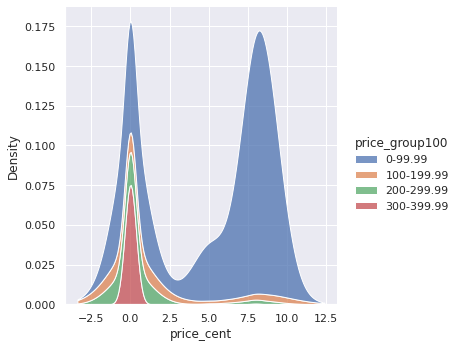

In [72]:
sns.set(rc={'figure.figsize':(20,10)})
sns.displot(df, x='price_cent', hue='price_group100', kind='kde', bw_adjust=2, multiple='stack')

Organic

In [57]:
df['organic'] = df['name'].str.lower()
df['organic'] = df['organic'].str.count('organic')
df['organic'] = df['organic'].clip(0, 1)
df['organic'].describe()

count    16615.000000
mean         0.050737
std          0.219467
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: organic, dtype: float64